# STA 208: Homework 1
This is based on the material in Chapters 2, 3 of 'Elements of Statistical Learning' (ESL), in addition to lectures 1-4.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

# 1. Conceptual Exercises

__Exercise 1.1.__ (5 pts) Recall that the Hamming loss for Binary classification ($y \in \{0,1\}$) is 
$$l(y,\hat y) = 1\{y \ne \hat y\} = (y - \hat y)^2$$
as long as $\hat y \in \{0,1\}$.
This loss can be extended to multiclass classification where there are $K$ possible values that $y$ can take (for example 'dog','cat','squirrel' or 1-5 stars).  Explain how you can re-encode $y$ and $\hat y$ to be a $K-1$ dimensional vector that generalizes binary classification, and rewrite the loss using vector operations.

There are $K$ possible values for y to choose, the range of y and $\hat y$ could be: $y,\hat{y} \in \begin{Bmatrix}a, & b, & c, & ...\end{Bmatrix}$. Then we use function to reencode $y$ and $\hat y$ to $Z(y)$ and $Z(\hat{y})$. When we want to classify $a$ from others, we can set function as:

$$Z(y)=\begin{cases}
1 & \text{ if } y=a \\ 
0 & \text{ if } y=others 
\end{cases}$$

and the loss function become $l(y,\hat y) = 1\{y \ne \hat y\} = g(Z(y),Z(\hat y))=(Z(y) - Z(\hat y))^2$. Accordingly, we can apply this method to any possible values, and this function become a binary classification.

__Exercise 1.2__ (5 pts) Ex. 2.7 in ESL

To simplify this problem lets begin in the case of simple linear regression where there is only
one response y and one predictor x. Then the standard definitions of y and X state that 

$y^{T}=(y_{1},...,y_{n})$  and  $X^{T}=\begin{bmatrix}
1 & ... & 1\\ 
x_{1} &...  &x_{n} 
\end{bmatrix}$

**(a)** For linear regression. we can use formula $\widehat{Y}=X^{T}\widehat{\beta }$ and $\widehat{\beta }=(X^{T}X)^{-1}X^{T}y$, and then we can set   $\widehat{f}(x_{0})=\begin{bmatrix}
x_{0} & 1
\end{bmatrix}(X^{T}X)^{-1}X^{T}y$. Accordingly, In terms of the notation of the question, 

$$l_{i}(x_{0};X)=\begin{bmatrix}
x_{0} & 1
\end{bmatrix}(X^{T}X)^{-1}\begin{bmatrix}
1\\ 
x_{i}\\
\end{bmatrix}$$ for each i with $1\leq i\leq n$.

More explicitly,$X^{T}X=\begin{bmatrix}
n & \sum x_{i}\\ 
\sum x_{i} & \sum x_{i}^{2}
\end{bmatrix}$ which has determinant $(n-1)\sum x_{i}^{2}-2n\sum_{i<y}x_{i}x_{j}$ which allow us to calculate more explicitly.

For k-nearest neighbor regression $l_{i}(x_{0};X)$ equals to 1/k if $x_{i}$ is one of the nearest k points and 0 otherwise.
$\widehat{f}(x_{0})=\sum_{i=1}^{N}\frac{y_{i}}{k}1_{x_{i}\in N_{k}(x0)}$ where $N_{k}(x0)$ represents the set of k-nearest-neighbours of $x_{0}$. So

$$l_{i}(x_{0};X)=\frac{1}{k}1_{x_{i}\in N_{k}(x0)}$$




**(b)** In this question $X, x_{0}, f(x_{0})$ are fixed, and $Y$ is a varaible.

$E_{Y|X}\left ( (f(x_{0})-\widehat{f}(x_{0}))^{2} \right )=f(x_{0})^{2}-2f(x_{0})E_{Y|X}\left(\widehat{f}(x_{0})\right)+E_{Y|X}\left(\widehat{f}(x_{0})^{2}\right)
=\left  (f(x_{0})-E_{Y|X}\left(\widehat{f}(x_{0})\right) \right)^{2}+E_{Y|X}\left(\left(\widehat{f}(x_{0})\right)^{2} \right)-\left(E_{Y|X}\left(\widehat{f}(x_{0})\right) \right)^{2}
=(bias)^{2}+Var(\widehat{f}(x_{0}))$

**(c)** The thinking of this question is the same as (b), the only difference is that $x_{0}, f(x_{0})$ are fixed, and $X, Y$ is a varaible.
$E_{Y,X}\left ( (f(x_{0})-\widehat{f}(x_{0}))^{2} \right )=f(x_{0})^{2}-2f(x_{0})E_{Y,X}\left(\widehat{f}(x_{0})\right)+E_{Y,X}\left(\widehat{f}(x_{0})^{2}\right)
=\left  (f(x_{0})-E_{Y,X}\left(\widehat{f}(x_{0})\right) \right)^{2}+E_{Y,X}\left(\left(\widehat{f}(x_{0})\right)^{2} \right)-\left(E_{Y,X}\left(\widehat{f}(x_{0})\right) \right)^{2}
=(bias)^{2}+Var(\widehat{f}(x_{0}))$

**(d)** The difference between this two is for b the $X$ is fixed, but for c, both $X,Y$ are variable. with the help of formula we can find out that conditional variance should be smaller than unconditional variance. For example:

$$Var(\hat f(x_0))=Var(E(\hat f(x_0)|X))+E(Var(\hat f(x_0)|X))$$

In addiiton, the conditional bias should be smaller than unconditional bias.

$$E[E_{Y|X}(\hat f(x_0))-f(x_0)]=E_{Y,X}(\hat f(x_0))-f(x_0) $$

__Exercise 1.3__ (5 pts, 1 for each part) Recall that the true risk for a prediction function, $f$, a loss function, $\ell$, and a joint distribution for $Y,X$ is 
$$R(f) = E \ell(y,f(x))$$
For a training set $\{x_i,y_x\}_{i=1}^n$, the empirical risk is 
$$R_n = \frac{1}{n} \sum_{i=1}^n \ell(y_i,f(x_i)).$$
Let $y = x^\top \beta + \epsilon$ be a linear model for $Y|X$, where $x,\beta$ are $p$-dimensional such that $\epsilon$ is Gaussian with mean 0 and variance $\sigma^2$ (independent of X).
Let $\ell(y,\hat y) = (y - \hat y)^2$ be square error loss.

1. Show that $f^\star(x) = x^\top \beta$ gives the smallest true risk (also known as the Bayes rule).
1. Why can't we use this prediction in practice?
1. Recall that OLS is the empirical risk minimizer for linear functions.  Why does this tell us the following:
$$ E R_n (\hat f) \le R(f^\star)$$
1. How do we know that $E R_n (\hat f) \le R(\hat f)$? and use this to answer Ex. 2.9 in ESL.  
1. What about this was specific to OLS and least squares loss (can this be generalized)?  What is the most general statement that you can think of that you can prove in this way?

1.

$$\begin{align*}
R(f) &= E\ell(y,f(x)) = E(y-f(x))^2 \\
& = E(x^\top \beta+\epsilon-f(x))^2\\
& = E(x^\top\beta+\epsilon)^2 - 2 E((x^\top\beta+\epsilon)f(x)) + E(f(x)^2)\\
& = \sigma^2 + E(x^\top\beta- f(x))^2
\end{align*}$$

when $f(x) = E(Y|x) = E(x^T\beta+\epsilon|x) = x^T \beta$

$E(x^\top\beta- f(x))^2 = 0$ 
Thus $f^\star(x) = x^\top\beta$ gives the smallest true risk.

2.
Since there are unknown parameter $\beta$, and we are not able to measure the whole population, we can't use this prediction in practice.

3.
From the result of OLS, we know that 

$$\hat \beta = (x^T x)^{-1} x^T y$$
$$\hat f = x\hat \beta = x(x^T x)^{-1} x^T y$$
$$e=f-\hat f=(1-x(x^T x)^{-1} x^T )y$$

Then we use previous formula to prove this question.

$$\begin{align*}
 ER_n(\hat{f}) &= E[\frac{1}{n}\sum_{i=1}^n \ell(y_i,\hat{f}(x_i))]\\
& = \frac{1}{n}\sum_{i=1}^n E\ell(y_i,\hat{f}(x_i))\\
& = \frac{1}{n}E(e^T e)\\
& = \frac{1}{n}E(y^T(1-x(x^T x)^{-1} x^T )y)\\
& = \frac{1}{n}E(Tr((1-x(x^T x)^{-1} x^T)E(yy^T)))\\
& = \frac{1}{n}(n-p)\sigma^2
\end{align*}$$

From question 1 we konw $R(f^*)=\sigma ^2$ so we know $ER_n(\hat{f})<R(f^*)$

4.
From question 3 we know: $ER_n(\hat{f}) \leq R(f^\star)$

From question 1 we know $f^*$ will give smallest risk, so $
R(f^\star) \leq R(f)$
$$ER_{tr}(\hat{\beta}) = E[\frac{1}{N}\sum_{i=1}^N (y_i-\hat{\beta}^\top x_i)^2]$$
The expetation of $R_{te}(\hat{\beta})$ is equivalent to the true risk, the expectation of $R_{tr}(\hat{\beta})$ is equivalent to $ER(\hat{f})$. According to the inequality above, we can prove the conclusion of ESL 2.9.

5.
I think at the most time, we use training data to train our model, so it's quite likely that model will fit trainning data better, and the expected training error is smaller than the predicted error. In addition, I believe the inequality will holds in previous formulas. If we want the prediction error more close to training error, we will need large and correct sample size, and the prediction data need to be chosen correctly. Then with right and correct model we will achieve good prediction. For example, we can prove that $ER_n(\hat{f})<R(f^*)$ hold also for KNN regression: If we let $F$ be the collection of function, we konw $\hat f = argmin_{f \in F}R(f|X_{tr})
$, which means that $X_{tr}=argmin_{X \in R^N \times R^p} R(X|\hat f)$. so for fixed $\hat f$, the empirical risk less than true risk.

__Exercise 1.4__ (5 pts) Ex. 3.5 in ESL

Consider that the ridge expression problem can be written as (by inserting zero as $x_{j} − x_{j}$)

$\hat\beta_{ridge}=argmin\left\{\ \sum_{i=1}^{N} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p}\overline{x}_{j}\beta _{j}-\sum_{j=1}^{p}(x_{ij}-\overline{x}_{j})\beta _{j}  \right)^{2}+\lambda \sum_{j=1}^{p}\beta ^{2}_{j}   \right\}$

From this we see that by defining “centered” values of $\beta$ as:

$$\beta ^{c}_{0}=\beta_{0}+\sum_{p}^{j=1}\overline{x}_{j}\beta _{j}$$

$$\beta ^{c}_{j}=\beta_{i}  i=1,2,...,p$$

Accordingly, the original function can be set as:

$\hat\beta_{ridge}=argmin\left\{\ \sum_{i=1}^{N} \left( y_{i}-\beta^{c}_{0}-\sum_{j=1}^{p}(x_{ij}-\overline{x}_{j})\beta^{c} _{j}  \right)^{2}+\lambda \sum_{j=1}^{p}\beta ^{c2}_{j}   \right\}$

The equivalence of the minimization results from the fact that if $\beta_{i}$ minimize its respective functional the $\beta_{i}^{c}$’s will do the same.

In order to understanding of this procedure, we can say that by shifting the xi’s to have zero mean we have translated all points to the origin. As such only the “intercept” of the data or $\beta_{0}$ is modified the “slope’s” or $\beta_{i}^{c}$ for i = 1, 2, . . . , p are not modified. So We can compute the value of $\beta_{0}^{c}$ in the above expression by setting the derivative with respect to this variable equal to zero (a consequence of the expression being at a minimum). We obtain:

$$\sum_{i=1}^{N} \left( y_{i}-\beta^{c}_{0}-\sum_{j=1}^{p}(x_{ij}-\overline{x}_{j})\beta _{j}  \right)=0$$

which implies $\beta_{0}^{c}=\hat y$  , the average of the $y_{i}$. When we consider the situation in lasso, we write lagelangri form of lasso expression below:

$\hat\beta_{lasso}=argmin\left\{\ \sum_{i=1}^{N} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p}\overline{x}_{j}\beta _{j}-\sum_{j=1}^{p}(x_{ij}-\overline{x}_{j})\beta _{j}  \right)^{2}+\lambda \sum_{j=1}^{p}\left |\beta_{j}  \right |   \right\}$

The same argument above can be used to show that the minimization required for the lasso can be written in the same way (with $\beta_{j}^{c2}$ replaced by $\left |\beta_{j}^{c} \right |$).The intercept in the centered case continues to be $\overline y$.

__Exercise 1.5__ (5 pts) Ex 3.9 in ESL

If we fit an ordinary least squares linear model with q terms then the QR decomposition
of $X_{1}$ or the equation $X_{1}= QR$ and together with Equation $\hat y=QQ^{T}y$ expresses $\hat y$ as a sum of q columns of Q.
Thus ˆy is the span of the columns of $Q$. Since $Q$ is related to $X_{1}$ by the Gram-Schmidt
orthogonilization process $\hat y$ is also in the span of the q columns of $X_{1}$. By properties of least
square estimates the residual $r = y − \hat y$ is in the orthogonal complement of the columns of
both $Q$ and $X_{1}$. To pick the next column $x_{j}$ of the p − q possible choices to add next, the
one we should pick should be the column that had the largest projection in the direction of
$r$. Thus we want to pick $x_{j}$ that is most parallel with $r$ to add next. Thus pick $j^{*}$ such that:

$$j^{*}=argmin_{j}\frac{\left | x_{j}^{T}r \right |}{\left \| x_{j} \right \|}$$

This $x_{j}$ will reduce the residual sum of squares the most. Let $X_{1} = QR$ be the $QR$ decomposition, and let $z_{i}$ be the i-th column of $Q (1 \leq i \leq q)$. So
$Q^{T}Q = I_{q}$ and R is upper triangular with strictly positive diagonal entries. The collection
{z1, . . . , zq} is an orthonormal basis of $C_{0}$, the column space of $X_{1}$. $C_{0}$ is also the column
space of Q. Let $\hat y$ be the orthogonal projection of the N-dimensional vector y to $C_{0}$.

For each j (q < j < p), let $C_{j}$ be the subspace of $R^{N}$ spanned by C0 and xj , the (j − q)-th column of X2. We define

<p style="text-align: center;">$u_{j}=x_{j}-\sum_{i=1}^{q}(z_{i}^{T}x_{j})z_{i}$ and</p>

<p style="text-align: center;">$v_{j}=\frac {u_{j}}{\left \| u_{j} \right \|}$</p>

and so {z1, . . . , zq, vj} is an orthonormal basis of $C_{j}$ . Now $\hat y_{j} = \hat y +(v^{T}_{j}y)v_{j}$ is the orthogonal
projection of y to $C_{j}$ , and so the residual sum of squares decreases by $(v^{T}_{j} y)^{2}$ if $\hat y$ is replaced by $\hat y_{j}$ . It follows that the best variable to include is the k-th, where $k = argmax_{q\leq j \leq p}\left | v_{j}^{T}y \right |$.We then set $z_{q+1} = v_{k}$.

Note that, during the computation, we need to know $z^{T}_{i}x_{j}$ for all i and j $(1 \leq i \leq q$ and $q < j \leq p$). We have therefore done already completed of the computation necessary
to include yet another variable in our Stepwise Forward Linear Regression. So this seems
reasonably efficient, and we know of no more efficient algorithm.

# 2. Data Analysis

## Instructions

You will be graded based on several criteria, and each is on a 5 point scale (5 is excellent - A - 1 is poor - C - 0 is not answered - D/F).  You should strive to 'impress us' if you want a 5.  This means excellent code, well explained conclusions, well annotated plots, correct answers, etc.

We will be grading you on several criteria:

- Conclusions: Conclusions should be consistent with the evidence provided, the conclusion should be well justified, the principles of machine learning that you have learned should be respected (such as overfitting and underfitting etc.)
- Correctness of calculations: code should be correct and reflect the principles learned in this course, the logic should be sound, the methods should match the setting and context, you should try many applicable methods that you have learned as long as they apply. 
- Code, Figures, and Text: Code should be annotated and easy to follow, with docstrings on the functions; captions, titles,  for figures 

__Exercise 2__ You should run the following code cells to import the code and reduce the variable set.  Address the questions after the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
%matplotlib inline
plt.style.use('ggplot')

# dataset path
data_dir = "."

In [2]:
sample_data = pd.read_csv(data_dir+"/hw1.csv", delimiter=',')
sample_data.head()

,quality,density,pH,alcohol,time
0,90.0,0.99780,3.51,9.4,5
1,68.5,0.99620,3.26,10.0,4
2,110.0,0.99630,3.25,9.2,5
3,71.5,0.99551,3.56,10.8,5
4,110.0,0.99600,3.28,9.8,6


The response variable is quality. 

In [13]:
sample_data[['quality','pH']].values

array([[  90.  ,    3.51],
       [  68.5 ,    3.26],
       [ 110.  ,    3.25],
       ..., 
       [  99.  ,    3.48],
       [  93.  ,    3.49],
       [  97.  ,    3.26]])

In [3]:
X = np.array(sample_data.iloc[:,range(1,5)])
y = np.array(sample_data.iloc[:,0])

In [4]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

__Exercise 2.1__ (5 pts) Compare the leave-one-out risk with the empirical risk for linear regression, on this dataset.

In [10]:
#import linear regression as lin1
lin1 = linear_model.LinearRegression(fit_intercept=False)
print('LOO Risk: '+ str(loo_risk(X,y,lin1)))
print('Emp Risk: ' + str(emp_risk(X,y,lin1)))

LOO Risk: 243.53350804
Emp Risk: 242.27402643


We can find out for linear regression, the leave one out risk is little bit higher than Empirical risk for square error loss. This make sense since at the most time the empirical risk should be lower because they use their own data to fit themselves.

__Exercise 2.2__ (10 pts) Perform kNN regression and compare the leave-one-out risk with the empirical risk for k from 1 to 50.  Remark on the tradeoff between bias and variance for this dataset and compare against linear regression.

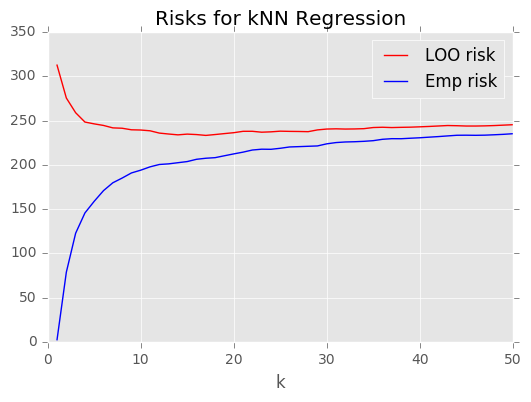

In [6]:
LOOs = []
MSEs = []
K=50
Ks = range(1,K+1)
for k in Ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(X,y,knn))
    MSEs.append(emp_risk(X,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("Risks for kNN Regression")
plt.plot(Ks,MSEs,'b',label="Emp risk")
plt.legend()
_ = plt.xlabel('k')

With the increasing of K, the Leave one out risk will decrease followed by increase, k=13 is the best value with risk 233.82, and empirical risk is increasing. In addition, both two risk converge toward similar value and the risk of Leave one out risk is little bit higher than Empirical risk. For this dataset, it's easy to find that increasing k will decrease variance and increase bias, since the higher k we have, the denominator($k^2$) when we calculate variance will be higher too, however, the bias will increase with more points being used. For Emp risk, the closest point is themself so we cn see the Emp risk is zero when use condition k=1. For LOO risk, we don't have the target point when we calculate risk, so it's very high when k is small. On the other hand, decreasing k will increase variance and decrease bias. When compared with linear regression, we can find out, when k is small, the leave one out risk of KNN regression will be higher than linear regression, and the empirical risk of KNN regression will be lower than linear regression, with the increasing of K, the risk of KNN regression risk will converge to linear regression risk.

__Exercise 2.3__ (10 pts) Implement forward stepwise regression (ESL section 3.3.2) for the linear model and compare the LOO risk for each stage.  Recall that at each step forward stepwise regression will select a new variable that most improves the empirical risk and include that in the model (starting with the intercept).

By implement forward stepwise regression below, I tried to find out the lowest square error for each step. We can find out with each step the square error will decrease, and the variable combination which can improve empirical risk best is 'time', 'pH', 'alcohol', 'density', which give the least square error of 242.247. On the other hand, I tried to use forward stepwise in another way. In each step, I tried to find out the variable combination give the highest adjusted R square (most corelated), then the answers shows that with each step, the R square value is increasing and the square error is decreasing, and final answer is different when compared with previous method. The variable combination which can give most corelated variables are 'time', 'pH', 'alcohol', which give the least square error of 242.25, and the best fit formula is:  quality ~ time + pH + alcohol + 1.

In [29]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by least square error
    """
    lin1 = linear_model.LinearRegression(fit_intercept=True)
    LOOs = []
    EMP = []
    cand_list = []
    #seperate predict data from others
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    #initial value
    current_score, best_new_score = 1000.0, 1000.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        #loop for calculting square error for each step
        for candidate in remaining:
            s_list = selected + [candidate]
            #calculate square error
            score = emp_risk(sample_data[s_list].values,sample_data['quality'].values,lin1)
            scores_with_candidates.append((score, candidate))
        #find the least value
        scores_with_candidates.sort(reverse = True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        #store least square error and variable combination for each step
        EMP.append(best_new_score)
        LOOs.append(loo_risk(sample_data[selected+[best_candidate]].values,sample_data['quality'].values,lin1))
        cand_list.append(selected + [best_candidate])
        #find the globle best score and combination
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            LOOs[-1]=LOOs[-2]
            cand_list[-1]=cand_list[-2]
    return LOOs,EMP, cand_list, best_new_score, selected

In [30]:
LOOstep,EMP, cand_list,best_score, best_cand = forward_selected(sample_data, 'quality')
for i in range(len(cand_list)):
    print 'step ',i+1,' score:',EMP[i],' variables:',cand_list[i]
print "smallest risk:",best_score,"\nbest parameter combination",best_cand

step  1  score: 258.155289149  variables: ['time']
step  2  score: 244.622200183  variables: ['time', 'pH']
step  3  score: 242.250597086  variables: ['time', 'pH', 'alcohol']
step  4  score: 242.247818463  variables: ['time', 'pH', 'alcohol', 'density']
smallest risk: 242.247818463 
best parameter combination ['time', 'pH', 'alcohol', 'density']


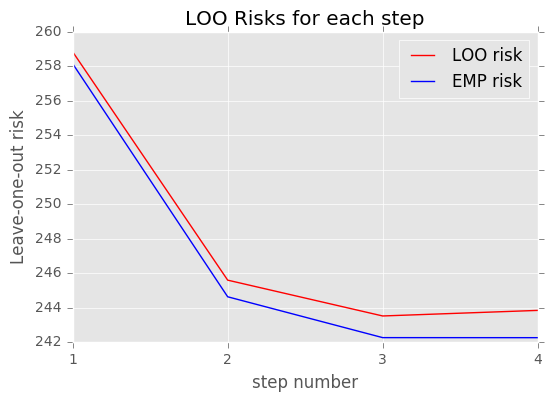

In [31]:
fig,ax=plt.subplots()
plt.plot([1,2,3,4],LOOstep,'r',label="LOO risk")
plt.plot([1,2,3,4],EMP,'B',label="EMP risk")
plt.title("LOO Risks for each step")
plt.legend()
ax.set_xticks([1,2,3,4])
_ = plt.xlabel('step number')
_ = plt.ylabel('Leave-one-out risk')

In [44]:
def forward_R_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    import statsmodels.formula.api as smf
    lin1 = linear_model.LinearRegression(fit_intercept=True)
    #initiate empty list to install best value for each step
    LOOs = []
    EMP = []
    cand = []
    R_score = []
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            #generate formula form for later package use 
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        #find best R square value, and variable combination for each step
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        R_score.append(best_new_score)
        if current_score < best_new_score:
            #restore value each time best answer changes
            cand.append(selected+[best_candidate] )
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            LOOs.append(loo_risk(sample_data[cand[-1]].values,sample_data['quality'].values,lin1))
            EMP.append(emp_risk(sample_data[cand[-1]],sample_data['quality'].values,lin1))
        else :
            #record previous best value if last step is not as good as previous one
            cand.append( selected )
            LOOs.append(LOOs[-1])
            EMP.append(EMP[-1])
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model,LOOs,EMP,cand,R_score

In [45]:
model,loorisk,EMPRISK, var,R_score = forward_R_selected(sample_data, 'quality')
for i in range(len(var)):
    print 'step ',i+1,' Rsquare:',R_score[i],' LOO:',loorisk[i],'EMP',EMPRISK[i], 'variables:',var[i]
print 'best fit formula: ',model.model.formula

step  1  Rsquare: 0.147446328671  LOO: 258.844899216 EMP 258.155289149 variables: ['time']
step  2  Rsquare: 0.191631686031  LOO: 245.588154312 EMP 244.622200183 variables: ['time', 'pH']
step  3  Rsquare: 0.198965624357  LOO: 243.508220022 EMP 242.250597086 variables: ['time', 'pH', 'alcohol']
step  4  Rsquare: 0.198471022824  LOO: 243.508220022 EMP 242.250597086 variables: ['time', 'pH', 'alcohol']
best fit formula:  quality ~ time + pH + alcohol + 1


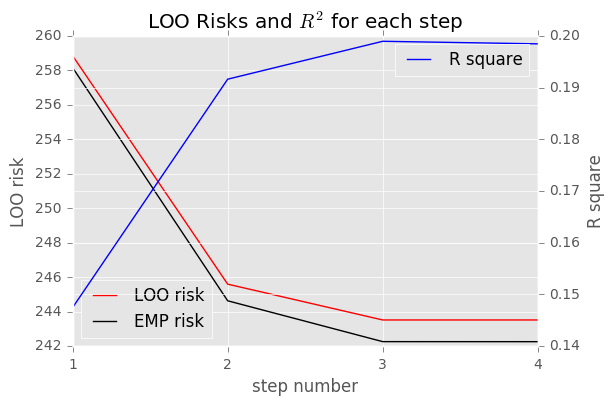

In [39]:
fig,left_axis=plt.subplots()
right_axis = left_axis.twinx()
p1,=left_axis.plot([1,2,3,4],loorisk,'r',label="LOO risk")
P3,=left_axis.plot([1,2,3,4],EMPRISK,'K',label="EMP risk")
p2, = right_axis.plot([1,2,3,4],R_score,'b',label='R square')
plt.title("LOO Risks and $R^2$ for each step")
left_axis.legend(loc=3)
right_axis.legend(loc=1)
left_axis.set_xticks([1,2,3,4])
left_axis.set_xlabel('step number')
left_axis.set_ylabel('LOO risk') 
right_axis.set_ylabel('R square') 
plt.show() 